In [1]:
#Configuración. Primero me importo las librerias necesarias para el ejercicio

#Tratamiento de datos
# ---------------------------------------
import pandas as pd
import numpy as np

#Gestión de nulos 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#Visualización
#-----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#para configurar los dataframes y ver todas las columnas 
pd.set_option('display.max_columns', None)

In [3]:
hr_data_clean = pd.read_csv('HR RAW DATA CLEAN.csv')
hr_data_clean

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork,SatisfactionLevel
0,162,51,No,Travel_Rarely,Unknown,6,3,Unknown,1,Male,3,5,Research Director,3,Unknown,19537.000000,6462,7,No,13,3,3,0,Unknown,5,3.000000,20,15,15,1972,Yes,A
1,259,52,No,Travel_Rarely,Unknown,1,4,Life Sciences,3,Male,2,5,Manager,3,Unknown,19999.000000,5678,0,No,14,3,1,1,Unknown,5,3.000000,33,11,9,1971,Yes,A
2,319,42,No,Travel_Rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,Manager,4,Married,19232.000000,4933,1,No,11,3,4,0,Unknown,3,2.759628,22,11,15,1981,Yes,A
3,1900,48,No,Travel_Rarely,Research & Development,22,3,Medical,4,Female,3,4,Manager,4,Unknown,17174.000000,2437,3,No,11,3,2,1,Unknown,3,3.000000,22,4,7,1975,Yes,A
4,81,59,No,Travel_Rarely,Unknown,25,3,Life Sciences,1,Female,3,3,Sales Executive,1,Unknown,6477.686122,2354,7,No,11,3,4,0,Unknown,3,2.000000,21,7,9,1964,Yes,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,Unknown,28,No,Travel_Rarely,Sales,43,4,Unknown,3,Female,3,2,Sales Executive,2,Unknown,6477.686122,3698,1,No,20,4,1,0,Unknown,2,3.000000,8,7,5,1995,No,B
1506,Unknown,26,Yes,Travel_Rarely,Unknown,5,2,Medical,3,Female,2,1,Research Scientist,3,Married,2366.000000,20898,1,No,14,3,1,1,Unknown,2,3.000000,8,1,7,1997,Yes,A
1507,Unknown,31,No,Travel_Rarely,Unknown,12,3,Medical,4,Female,3,2,Healthcare Representative,4,Unknown,6477.686122,17369,0,No,11,3,3,2,Unknown,2,1.000000,9,8,5,1992,Yes,A
1508,Unknown,39,No,Travel_Rarely,Unknown,13,5,Unknown,3,Male,4,3,Sales Executive,3,Single,6477.686122,2560,0,No,18,3,4,0,Unknown,3,3.000000,8,0,7,1984,Yes,A


In [10]:
hr_data_clean.columns

Index(['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DateBirth', 'RemoteWork', 'SatisfactionLevel'],
      dtype='object')

In [18]:
#Let's compare the different levels of satisfactions
hr_data_satisfaction = hr_data_clean[["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction"]]

hr_data_satisfaction
          

,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction
0,3,1,3
1,3,3,1
2,4,3,4
3,4,4,2
4,1,1,4
...,...,...,...
1505,2,3,1
1506,3,3,1
1507,4,4,3
1508,3,3,4


In [29]:
Job_Satisfaction = hr_data_clean["JobSatisfaction"].value_counts(normalize=True)*100

Job_Satisfaction

JobSatisfaction
4    31.390728
3    29.867550
1    19.536424
2    19.205298
Name: proportion, dtype: float64

In [53]:
Environment_Satisfaction = hr_data_clean["EnvironmentSatisfaction"].value_counts(normalize=True)*100

Environment_Satisfaction

EnvironmentSatisfaction
3    35.099338
4    28.543046
1    18.344371
2    18.013245
Name: proportion, dtype: float64

In [54]:
Relationship_Satisfaction = hr_data_clean["RelationshipSatisfaction"].value_counts(normalize=True)*100

Relationship_Satisfaction

RelationshipSatisfaction
3    31.192053
4    29.271523
2    20.596026
1    18.940397
Name: proportion, dtype: float64

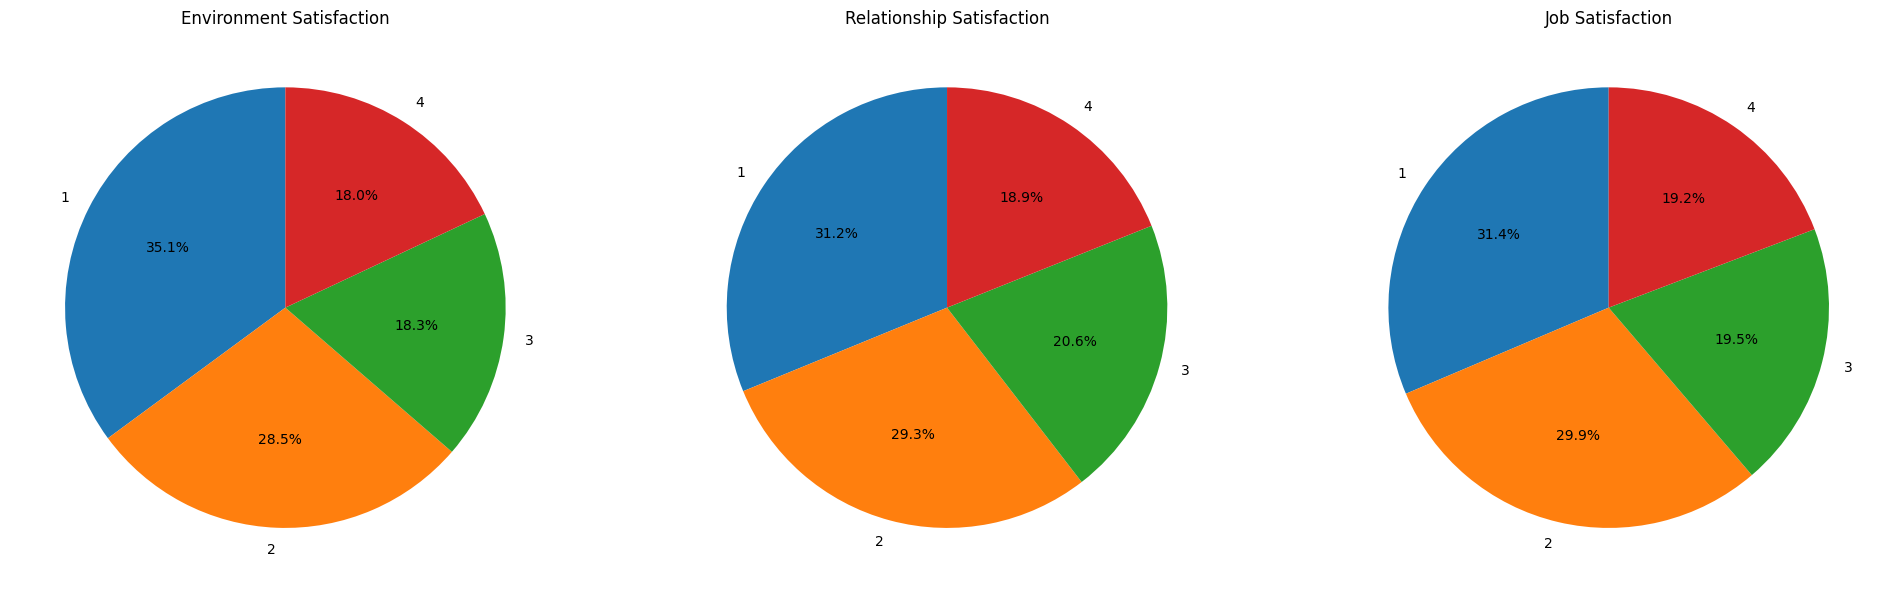

In [52]:
# Crear una figura con una cuadrícula de 1 fila y 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Crear gráfico de pastel para Environment Satisfaction
axes[0].pie(Environment_Satisfaction,
            labels=["1", "2", "3", "4"], 
            autopct='%1.1f%%', 
            startangle=90)
axes[0].set_title("Environment Satisfaction")

# Crear gráfico de pastel para Relationship Satisfaction
axes[1].pie(Relationship_Satisfaction,
            labels=["1", "2", "3", "4"], 
            autopct='%1.1f%%', 
            startangle=90)
axes[1].set_title("Relationship Satisfaction")

# Crear gráfico de pastel para Job Satisfaction
axes[2].pie(Job_Satisfaction,
            labels=["1", "2", "3", "4"], 
            autopct='%1.1f%%', 
            startangle=90)
axes[2].set_title("Job Satisfaction")

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

/var/folders/sm/rkmxkpbs0wj9l1__4qch0mch0000gn/T/ipykernel_29283/1333155605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hr_data_clean,


<Axes: xlabel='Department', ylabel='MonthlyRate'>

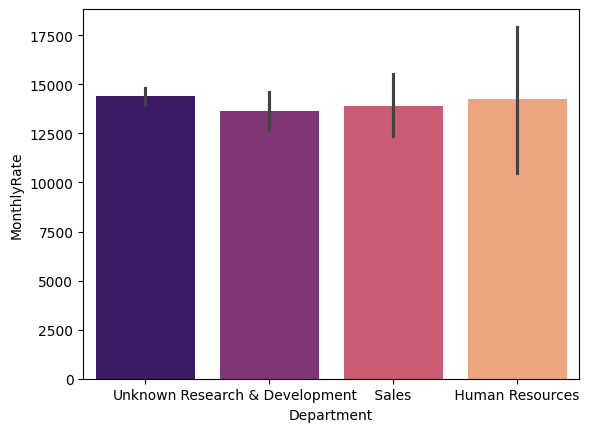

In [7]:
#What departments would be more expensive for the company? 
sns.barplot(data=hr_data_clean, 
            x="Department",
            y="MonthlyRate", 
            palette="magma")

In [62]:

hr_data_performance= hr_data_clean[["PerformanceRating", "JobInvolvement"]]

hr_data_performance
          

,PerformanceRating,JobInvolvement
0,3,3
1,3,2
2,3,3
3,3,3
4,3,3
...,...,...
1505,4,3
1506,3,2
1507,3,3
1508,3,4


In [66]:
hr_data_clean["JobInvolvement"].unique()

array([3, 2, 1, 4])